In [1]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from tqdm import tqdm as tq
from collections import Counter
import math
import numpy as np

In [2]:
data=pd.read_csv('final_dataset_2_rm_nan_url.csv')
data=data.drop('Unnamed: 0',axis=1)
data

,placeName,placeTags,numPeopleVisited,numPeopleWant,placeDesc,placeShortDesc,placeNearby,placeAddress,placeAlt,placeLong,placeEditors,placePubDate,placeRelatedLists,placeRelatedPlaces,placeURL
0,City Hall Station,"Manhattan, New York",1824.0,8569.0,The first New York City subway was built and o...,"City Hall Station,Manhattan, New York, A beaut...","['Tunnel Number 3', 'African Burial Ground Nat...","31 Centre StNew York, New York, 10007United St...",40.7134,-74.0046,"['charding407', 'fosterc827', 'Mike H', 'erjef...","May 8, 2010",['30 Unexpected Places to Have a Joyful Advent...,"['Crystal Palace Subway', 'Moscow Metro Statio...",https://www.atlasobscura.com/places/city-hall-...
1,Highgate Cemetery,"London, England",2615.0,8179.0,"Opened in 1839, Highgate is one of London’s mo...","Highgate Cemetery,London, England, London's cr...","['Dick Whittington’s Cat', ""World's Largest Po...","Swain's Lane, HighgateLondon, England, N6Unite...",51.5675,-0.1483,"['thesecretcity', 'thedyerghoulhouse', 'juliap...","August 9, 2014","[""The World's Top 100 Wonders in 2018"", ""Londo...","['Jewett City Vampires', 'Tomb of the Mather F...",https://www.atlasobscura.com/places/highgate-c...
2,Leadenhall Market,"London, England",3133.0,7560.0,The ornate 19th-century painted roof and cobbl...,"Leadenhall Market,London, England, This ornate...","['The Cornhill Devils', ""London's Original and...","London, England, EC3VUnited Kingdom",51.5126,-0.0834,"['Julius Spada', 'Katecrimson', 'thesecretcity...","August 1, 2016","['The Ultimate Guide to Stunning, Surprising, ...","['Rivendell', 'Bagdad Cafe', 'Gare de la Ciota...",https://www.atlasobscura.com/places/leadenhall...
3,The Wave Organ,"San Francisco, California",2426.0,7400.0,"Located on a jetty in the San Francisco Bay, t...","The Wave Organ,San Francisco, California, A hu...","['The Stern of the Brigantine Galilee', 'Long ...","83 Marina Green DrSan Francisco, California, 9...",37.8085,-122.4401,"['routt1111', 'wefiddleboy14', 'Saal333', 'Nei...","November 21, 2008","[""Leonardo Nam's 16 Quirky Roadside Attraction...","['Sea Organ', 'Silent Green Kulturquartier', ""...",https://www.atlasobscura.com/places/wave-organ
4,Catacombes de Paris,"Paris, France",4442.0,7036.0,"In 2004, Parisian police were assigned to do a...","Catacombes de Paris,Paris, France, The vast, l...","['Sculptures de Décure', ""Jeannot's Floor"", 'A...","1 Place Denfert-RochereauParis, 75014France",48.8343,2.3322,"['marypippen', 'ramonrodz2212', 'mathewbrowne'...","February 13, 2009","['19 Catacombs Sure to Tingle Your Spine', ""Th...","['Ossario di San Martino', 'Leuk Charnel House...",https://www.atlasobscura.com/places/catacombes...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,Xul Solar Museum,"Buenos Aires, Argentina",129.0,405.0,With dreams of reforming and perfecting the un...,"Xul Solar Museum,Buenos Aires, Argentina, Xul ...","['Ricardo Rojas House Museum', 'Villa Freud', ...",Laprida 1212Buenos AiresArgentina,-34.5948,-58.4078,[],"September 12, 2016","[""A Linguistics Lover's Tour of the World""]","['Blenko Man', 'Ilana Goor Museum', 'Museo de ...",https://www.atlasobscura.com/places/xul-solar-...
7196,Klatovy Catacomb Mummies,"Klatovy, Czechia",49.0,405.0,In an underground crypt beneath a Jesuit churc...,"Klatovy Catacomb Mummies,Klatovy, Czechia, The...","['Drachenstich-Festspiele', 'Poledník Lookout ...",DenisovaKlatovyCzechia,49.3951,13.2918,[],"February 25, 2016","['19 Catacombs Sure to Tingle Your Spine', ""Bo...","['Rothwell Bone Crypt', 'Ossario di San Martin...",https://www.atlasobscura.com/places/klatovy-ca...
7197,Termesphere Gallery,"Spearfish, South Dakota",71.0,405.0,"Most artists paint on a a flat plane, but in t...","Termesphere Gallery,Spearfish, South Dakota, T...","['Fish Car No. 3', 'Mount Roosevelt Friendship...","1920 Christensen DriveSpearfish, South Dakota,...",44.4574,-103.8258,[],"August 19, 2014",NaN,NaN,https://www.atlasobscura.com/places/termespher...
7198,Wheeler 

In [3]:
def preprocess(text:str):
    ### Converting to lowercase
    text = text.lower()
    
    ### Removing Punctuation
    text_p = "".join([char for char in text if char not in string.punctuation])
    
    ### Converting strings to tokens of individual words in a complete string
    words = word_tokenize(text_p)
    
    ### Remove Stopwords
    stop_words = stopwords.words('english')
    filtered_words = [word for word in words if word not in stop_words]
    
    ### Get the root of the word i.e stemming
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in filtered_words]
    
    return stemmed

In [4]:
### Reading Stored inverted index
inverted_index_dataframe=pd.read_csv('inverted_index_tf_idf.csv')

inverted_index_dataframe=inverted_index_dataframe.drop('Unnamed: 0',axis=1)
for column in inverted_index_dataframe:
    
    if column=='Document_id' or column=='Doc_id_tf_idf':
        
        inverted_index_dataframe[column]=inverted_index_dataframe[column].apply(lambda row: eval(row) ) #converting strings to object type
inverted_index_dataframe

,Term_id,Document_id,Doc_id_tf_idf
0,-7165125546970577434,"[8650740614433979565, 6762175636761094086, -69...","[{8650740614433979565: 0.005076142131979695}, ..."
1,-77033085036089818,"[8650740614433979565, 7692525456237221879, -20...","[{8650740614433979565: 0.015228426395939087}, ..."
2,4204630629893213509,"[8650740614433979565, -8595611825221734725, -8...","[{8650740614433979565: 0.015228426395939087}, ..."
3,1325781193330695663,"[8650740614433979565, 6762175636761094086, 289...","[{8650740614433979565: 0.030456852791878174}, ..."
4,3196231265570269517,"[8650740614433979565, -8946468704458547891, -7...","[{8650740614433979565: 0.005076142131979695}, ..."
...,...,...,...
51787,-876772972226081506,[-708361252141436895],[{-708361252141436895: 0.008403361344537815}]
51788,-1721524412824808313,[-708361252141436895],[{-708361252141436895: 0.008403361344537815}]
51789,5801661624547006870,[1851989602745493214],[{1851989602745493214: 0.02097902097902098}]
51790,-109308169976446818,[1851989602745493214],[{1851989602745493214: 0.006993006993006993}]


In [5]:
### Reading Document data_frame containing key of the documents.

data_des=pd.read_csv('description_hash_key.csv')
data_des=data_des.drop('Unnamed: 0',axis=1)

for column in data_des:
    
    if column=='processed':
        
        data_des[column]=data_des[column].apply(lambda row: eval(row) ) #converting strings to object type
        
data_des['Title']=data['placeName']
data_des['placeURL']=data['placeURL']
data_des


,placeDesc,processed,hash_key,Title,placeURL
0,The first New York City subway was built and o...,"[first, new, york, citi, subway, built, oper, ...",8650740614433979565,City Hall Station,https://www.atlasobscura.com/places/city-hall-...
1,"Opened in 1839, Highgate is one of London’s mo...","[open, 1839, highgat, one, london, ’, infam, c...",6762175636761094086,Highgate Cemetery,https://www.atlasobscura.com/places/highgate-c...
2,The ornate 19th-century painted roof and cobbl...,"[ornat, 19thcenturi, paint, roof, cobbl, floor...",-5302886591338703343,Leadenhall Market,https://www.atlasobscura.com/places/leadenhall...
3,"Located on a jetty in the San Francisco Bay, t...","[locat, jetti, san, francisco, bay, wave, orga...",2892850636241140390,The Wave Organ,https://www.atlasobscura.com/places/wave-organ
4,"In 2004, Parisian police were assigned to do a...","[2004, parisian, polic, assign, train, exercis...",-6945605901378363543,Catacombes de Paris,https://www.atlasobscura.com/places/catacombes...
...,...,...,...,...,...
7195,With dreams of reforming and perfecting the un...,"[dream, reform, perfect, univers, argentin, ar...",1224246858281487530,Xul Solar Museum,https://www.atlasobscura.com/places/xul-solar-...
7196,In an underground crypt beneath a Jesuit churc...,"[underground, crypt, beneath, jesuit, church, ...",-4768850378645810701,Klatovy Catacomb Mummies,https://www.atlasobscura.com/places/klatovy-ca...
7197,"Most artists paint on a a flat plane, but in t...","[artist, paint, flat, plane, termespher, galle...",2318087413727924295,Termesphere Gallery,https://www.atlasobscura.com/places/termespher...
7198,At least six mountains in the southwestern Uni...,"[least, six, mountain, southwestern, unit, sta...",-708361252141436895,Wheeler Peak,https://www.atlasobscura.com/places/wheeler-peak


In [6]:
### Vocabulary 

vocabulary_df=pd.read_csv('vocabulary.csv')
vocabulary_df.rename(columns={'Unnamed: 0':'Term_id'},inplace=True)
# vocabulary_df.index=vocabulary_df['Term_id']
vocabulary_df=vocabulary_df.dropna()
vocabulary_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51790 entries, 0 to 51791
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Term_id       51790 non-null  object
 1   term_hashkey  51790 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [7]:
### Query_function
def get_query(query:str,vocabulary_df,inverted_index_dataframe,data_des):
    try:
        query_processed=preprocess(query)
        
        ### Get the term_id from vocabulary
        term_id=[vocabulary_df[vocabulary_df.Term_id==i].term_hashkey.values[0] for i in query_processed]
        
        ## Get the documents index from inverted index
        query_documents=[inverted_index_dataframe[inverted_index_dataframe.Term_id==i].Document_id.values[0] for i in term_id]

        ### Intersection of the documents_id 
        if len(query_documents)>1:
            for i in range(1,len(query_documents)):
                if i==1:
                    document_id=set(query_documents[i-1]).intersection(query_documents[i])

                else:
                    document_id=document_id.intersection(query_documents[i])

        else:
            document_id=query_documents[0]


        return data_des[data_des.hash_key.isin(document_id)][['placeDesc','Title','placeURL']],document_id
    except:
         return print('The query is not present in the dataset')


In [8]:
query='american museum'
documents,id=get_query(query,vocabulary_df,inverted_index_dataframe,data_des)
documents

,placeDesc,Title,placeURL
59,The Salem witchcraft trials took place between...,The Witch House of Salem,https://www.atlasobscura.com/places/witch-hous...
141,The dime or dime store museum is by all accoun...,Museum of the Weird,https://www.atlasobscura.com/places/museum-weird
173,Las Vegas is an oasis in the desert where no o...,National Atomic Testing Museum,https://www.atlasobscura.com/places/national-a...
224,Ripe for quiet reflection and simply awe-inspi...,Canyons of the Ancients,https://www.atlasobscura.com/places/canyons-of...
320,Often cited as having a place among the great ...,The Natural Bridge,https://www.atlasobscura.com/places/the-natura...
...,...,...,...
7064,There is only one place in Nevada where you wi...,Wilbur D. May Museum,https://www.atlasobscura.com/places/wilbur-d-m...
7105,"In September of 1777, the British defeated Geo...",The Liberty Bell Hiding Place,https://www.atlasobscura.com/places/liberty-be...
7147,"“To collect, preserve, interpret, and display ...",American Computer Museum,https://www.atlasobscura.com/places/american-c...
7154,"The Akin Free Library, a gracious stone struct...",Akin Free Library,https://www.atlasobscura.com/places/akin-free-...


In [129]:
## Note since I have reading the sotred version of inverted index you don't need it to use to get your tf_idf
def inverted_index_tf_idf(inverted_index_dataframe,data_des,vocabulary_df):
    ### Calculation for tf_idf for each word in vocabulary and each document
    
        for i,j in tq(enumerate(inverted_index_dataframe.index)):
             try:
                x=[]
                term_id=inverted_index_dataframe.Term_id.iloc[i]
                ### Get word from the vocabulary_df
                word=vocabulary_df[vocabulary_df.term_hashkey==term_id].Term_id.values[0] #### [Twovalues NaN in vocabulary;Check for it]


                idf=np.log(len(data_des)/len(inverted_index_dataframe.Document_id.iloc[i])) ### Note:Do this with tf_idf_colmum

                if idf>0:
            ### Get place description:
                    for k in range(len(inverted_index_dataframe.Document_id.iloc[i])):
                        doc_id=inverted_index_dataframe.Document_id.iloc[i][k]
                        tf_idf=''.join(data_des[data_des.hash_key==doc_id].processed.values[0]).count(word)/len(data_des[data_des.hash_key==doc_id].processed.values[0])
                        x.append({doc_id:tf_idf})
                inverted_index_dataframe.Doc_id_tf_idf.at[i]=x
             except:
                inverted_index_dataframe.Doc_id_tf_idf.at[i]=[]

            
        return inverted_index_dataframe


In [9]:
def get_document_vector(query,vocabulary_df,inverted_index_dataframe):
    query_processed=preprocess(query)

    ### Get the term_id from vocabulary
    term_id=[vocabulary_df[vocabulary_df.Term_id==i].term_hashkey.values[0] for i in query_processed]

    ## Get the dictionary of {document_id:tf_idf scores} for each terms.
    query_documents=[inverted_index_dataframe[inverted_index_dataframe.Term_id==i].Doc_id_tf_idf.values[0] for i in term_id]

    #### get the document_id for each of the term
    query_documents_keys=[]
    for i in range(len(query_documents)):
        list_query=[list(i.keys())[0] for i in query_documents[i]]
        query_documents_keys.append(list_query)

    ####Find the intersection of document_id's for all the terms to get those document_id which contains all the queries
    if len(query_documents_keys)>1:
        for i in range(1,len(query_documents_keys)):
            if i==1:
                document_id=set(query_documents_keys[i-1]).intersection(query_documents_keys[i])

            else:
                document_id=document_id.intersection(query_documents_keys[i])

    else:
        document_id=query_documents_keys[0]

    ### Based on the retrieved common document_id get the values for tf_idf score for each terms.
    query_documents_values=[]
    for i in range(len(query_documents)):
        list_query=[list(i.values())[0] for i in query_documents[i] if list(i.keys())[0] in document_id]
        query_documents_values.append(list_query)

    #### Create document vector whose individual length corresponds the number of queries.
    query_document_vector=zip(*query_documents_values)
    
    return query_document_vector,document_id



In [110]:

def get_query_vector(query,vocabulary_df,inverted_index_dataframe):
    
    ## Pre-processing query
    query_processed=preprocess(query)
    
    ### Get the term_id from vocabulary
    term_id=[vocabulary_df[vocabulary_df.Term_id==i].term_hashkey.values[0] for i in query_processed]


    ## Get the documents index from inverted index
    query_idf=[np.log(len(data_des)/len(inverted_index_dataframe[inverted_index_dataframe.Term_id==i].Doc_id_tf_idf.values[0])) for i in term_id]
    query_tf=[1/len(query_processed) for i in query_processed]

    query_vector=np.multiply(query_idf,query_tf)
    return query_vector

In [97]:
def calculate_cosine_similarity(query_vector:list,query_document_vector):
    x=[]
    for i in tq(query_document_vector):
  
        z=np.dot(query_vector,i)/(np.linalg.norm(query_vector)*np.linalg.norm(i))

#         z=z.sum()/math.sqrt(len(query_processed)) ### Take care of the parameterisation of the calculation,it would lenght of the quer

        x.append(z)
    return x

In [127]:
def get_top_k(query,vocabulary_df,inverted_index_dataframe,data_des,k):
    
    query_document_vector,document_id1=get_document_vector(query,vocabulary_df,inverted_index_dataframe)
    
    query_vector=get_query_vector(query,vocabulary_df,inverted_index_dataframe)

    query_df,document_id2=get_query(query,vocabulary_df,inverted_index_dataframe,data_des)
    similarity=calculate_cosine_similarity(query_vector,query_document_vector)
#     query_document_vector,document_id1=get_document_vector(query,vocabulary_df,inverted_index_dataframe)
#     query_df['Document_vector']=[i for i in query_document_vector]
#     query_document_vector,document_id1=get_document_vector(query,vocabulary_df,inverted_index_dataframe)
#     query_df['query_vector']=[query_vector for i in query_document_vector]
             
    query_df['similarity']=similarity
    
    return query_df.sort_values(by='similarity',ascending=False).head(k)

In [128]:
query='american museum'
k=300
get_top_k(query,vocabulary_df,inverted_index_dataframe,data_des,k)

244it [00:00, 81899.02it/s]


,placeDesc,Title,placeURL,similarity
2076,"A visit to the National Mall in Washington, D....",Mitsitam Native Foods Cafe,https://www.atlasobscura.com/places/mitsitam-n...,0.999934
6872,"Constructed by a local lawyer from 1908-1912, ...",Indian Steps Museum,https://www.atlasobscura.com/places/indian-ste...,0.999934
4989,"In 1882, the Kingdom of Hawai’i unveiled a new...",Iolani Palace,https://www.atlasobscura.com/places/iolani-palace,0.999031
3165,The Renwick Gallery building has the distincti...,Renwick Gallery,https://www.atlasobscura.com/places/renwick-ga...,0.995806
5395,Just off the side of the highway in St. Charle...,Weldon Spring Disposal Site,https://www.atlasobscura.com/places/weldon-spr...,0.988263
...,...,...,...,...
4968,If there is a place on earth that knows its wh...,Oscar Getz Museum of Whiskey History,https://www.atlasobscura.com/places/oscar-getz...,0.686298
1261,In the depths of the Museum of the Art Institu...,Thorne Miniature Rooms,https://www.atlasobscura.com/places/thorne-min...,0.676272
1892,"Perhaps once thought too narrowly focused, thi...",National World War II Museum,https://www.atlasobscura.com/places/national-w...,0.676272
1206,Collecting three different institutions into o...,Harvard Museum of Natural History,https://www.atlasobscura.com/places/harvard-mu...,0.668136


[2.153207691919445, 1.5766480896111095] [0.5, 0.5]
244 244


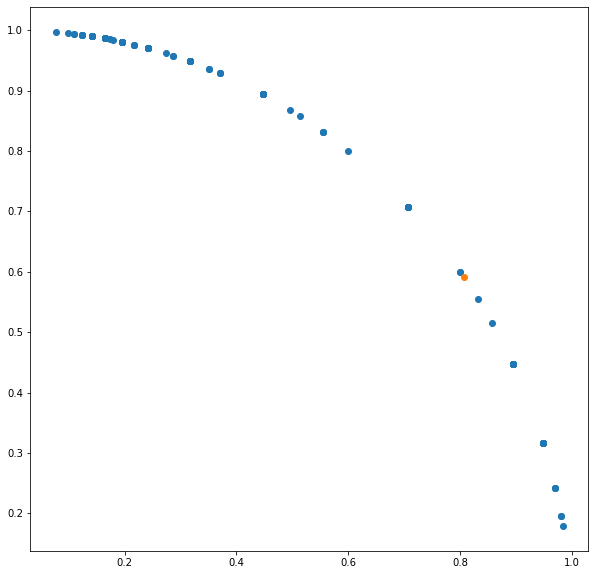

In [94]:
import matplotlib.pyplot as plt
import random
query='american museum'
query_document_vector,document_id1=get_document_vector(query,vocabulary_df,inverted_index_dataframe)
query_vector=get_query_vector(query,vocabulary_df,inverted_index_dataframe)

query_df,document_id2=get_query(query,vocabulary_df,inverted_index_dataframe,data_des)
x_axis=[i[0]/np.linalg.norm(i) for i in query_document_vector]
query_document_vector,document_id1=get_document_vector(query,vocabulary_df,inverted_index_dataframe)
y_axis=[i[1]/np.linalg.norm(i) for i in query_document_vector]
print(len(x_axis),len(y_axis))
fig, axes = plt.subplots(1,figsize=(10,10))
plt.scatter(x=x_axis,y=y_axis)
# i=0
# # print(document_id1)
# for x,y in zip(x_axis,y_axis):
#     plt.annotate(str(list(document_id1)[i])[0:3],(x,y),xytext=(x+0.02,y+0.02))
#     i=i+1
    
    
    
plt.scatter(x=query_vector[0]/np.linalg.norm(query_vector),y=query_vector[1]/np.linalg.norm(query_vector))